In [2]:
""" 計算ytm 可以計算負利率債券!
輸入Current Bond Price、Bond Par Value、Bond Coupon Rate (% p.a.)、
Years to Maturity、Payment(annually、semi-annually、quarterly)
輸出Yield to Maturity (YTM)
"""
current_p = float(input("債券現價 (萬元) = ")) #Current Bond Price
par_p = float(input("債券面值 (萬元) = ")) #Bond Par Value
coupon_r_input = float(input("票面利率 (%) = ")) #Bond Coupon Rate (% p.a.)
coupon_r = coupon_r_input / 100
y = float(input("期數(年) = ")) #Years to Maturity 期數(年)可為非負小數
if y <= 0:
    print("期數不可為零或是負數")
else:
    times = 0
    payment_mode = str(input(" a = annually、s = semi-annually、 q = quarterly = q "))
    if payment_mode == "a":
        times = 1
    elif payment_mode == "s":
        times = 2
    elif payment_mode == "q":
        times = 4
    #-----------判斷正負殖利率
    pos_nag_interest = 0
    if current_p < par_p + coupon_r * par_p * y:
        pos_nag_interest = 1 #正
    elif current_p == par_p + coupon_r * par_p * y:
        pos_nag_interest = 0 #零
        print("ytm = 0")
    elif current_p > par_p + coupon_r * par_p * y:
        pos_nag_interest = -1 #負
    if pos_nag_interest != 0:
        ytm = 0.0
        n = int(y * times) #付息次數
        coupon = coupon_r * par_p / times #每次付息金額
        for i in range(100000):
            pv = 0
            test_ytm = i * 0.00001 * pos_nag_interest
            for j in range(1,n+1):
                pv += coupon / ((1+(test_ytm/times))**j)
            pv += par_p / ((1+(test_ytm/times))**n)
            if pos_nag_interest == 1: #正
                if pv - current_p < 0:
                    ytm = test_ytm
                    break
            if pos_nag_interest == -1: #負
                if pv - current_p > 0:
                    ytm = test_ytm
                    break
        print("ytm為",round(ytm*100,3),"%")

債券現價 (萬元) = 1.3
債券面值 (萬元) = 1
票面利率 (%) = 2
期數(年) = 3
 a = annually、s = semi-annually、 q = quarterly = q q
ytm為 -6.913 %


In [3]:
#計算spot rate
import math

current_p = float(input("債券現價 (萬元) = ")) #Current Bond Price
par_p = 1 #預設par = 1
par_p = float(input("債券面值 (萬元) = ")) #Bond Par Value
d = float(input("存續期間(年) = ")) #Years to Maturity 期數(年)可為非負小數
spot_r1 = 0.0
spot_r2 = 0.0
test = 0.0
if d <= 0:
    print("期數不可為零或是負數")
else:
    p = current_p / par_p
    spot_r1 = (p ** (-1/d)) -1
    spot_r2 = math.log(p)*(-1/d)
    test = math.log(spot_r1+1)
    print(d,"year spot rate of interest:",round(spot_r1*100,3),"%")
    print(d,"year spot rate of interest:",round(spot_r2*100,3),"%")

債券現價 (萬元) = 95
債券面值 (萬元) = 100
存續期間(年) = 3
3.0 year spot rate of interest: 1.724 %
3.0 year spot rate of interest: 1.71 %


In [5]:
#forward rate
import math

t = float(input("Time due for the beginning of forward rate(years) = ")) #Time due for the beginning of forward rate(years)
r = float(input("Duration of forward rate(years) = ")) #Duration of forward rate(years)
current_p = float(input("Price of "+str(r)+" year unit zero coupon bond = ")) #Current Bond Price
total_y = r+t
par_p = float(input("Price of "+str(total_y)+" year unit zero coupon bond = ")) #Bond Par Value
forward_r1 = 0.0
forward_r2 = 0.0
if r <= 0 or t <= 0:
    print("期數不可為零或是負數")
else:
    p = current_p / par_p
    forward_r1 = (p ** (1/r)) -1
    forward_r2 = math.log(p)*(1/r)
    test = math.log(forward_r1+1)
    print(r,"year forward rate of interest beginning",t,"years from now:",round(forward_r1*100,3),"%")
    print(r,"year forward rate of interest beginning",t,"years from now:",round(forward_r2*100,3),"%")

Time due for the beginning of forward rate(years) = 4
Duration of forward rate(years) = 3
Price of 3.0 year unit zero coupon bond = 100
Price of 7.0 year unit zero coupon bond = 97
3.0 year forward rate of interest beginning 4.0 years from now: 1.02 %
3.0 year forward rate of interest beginning 4.0 years from now: 1.015 %


Time due for the beginning of forward rate(years): = 5
Price of 3.0 year unit zero coupon bond: = 4
Price of 5 year unit zero coupon bond: = 3


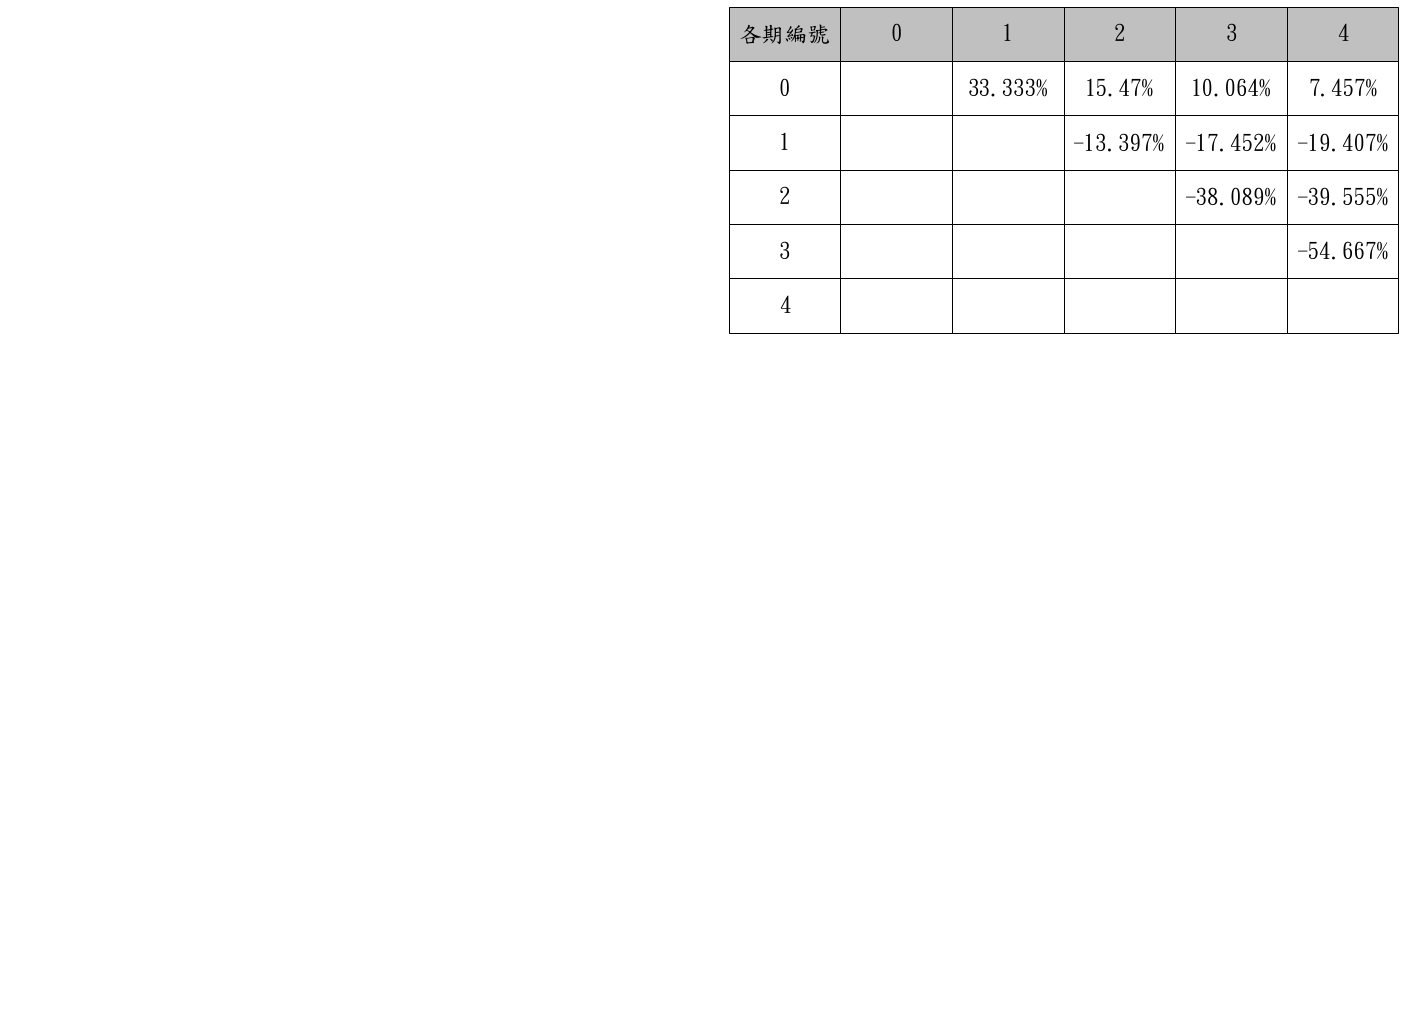

In [7]:
#forward rate
import math

t = float(input("Time due for the beginning of forward rate(years): = ")) #Years to Maturity 期數(年)
current_p = float(input("Price of "+str(r)+" year unit zero coupon bond: = ")) #Current Bond Price
total_y = int(t)
par_p = float(input("Price of "+str(total_y)+" year unit zero coupon bond: = ")) #Bond Par Value

ans_li = []
for i in range(total_y):
    ans_li.append([str(i)])
if t <= 0:
    print("期數不可為零或是負數")
else:
    for x in range(total_y):
        for y in range(total_y):
            if x >= y:
                ans_li[x].append("")
            else:
                forward_r1 = 0.0
                p = current_p / par_p
                forward_r1 = (p ** (1/y-x)) -1
                ans_li[x].append(str(round(forward_r1*100,3))+"%")
    #---------------------------------以下用matplotlib製作表格輸出
    import matplotlib.pyplot as plt
    import pandas as pd
    plt.figure(figsize=(12, 12))
    font = {'family' : 'DFKai-SB',
    'weight' : 'bold',
    'size'  : '30'} #字型設定
    plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
    plt.rc('axes',unicode_minus=False) #字型設定
    col_labels = ["各期編號"]
    for i in range(total_y):
        col_labels.append(str(i))
    row_colors = [] 
    for i in range(total_y+1):
        if i%2 == 0:
            row_colors.append("silver")
        else:
            row_colors.append("silver")
    plt.axis('off')
    present_l2 = pd.DataFrame(ans_li, columns=col_labels)
    plt.table(cellText=present_l2.values, colLabels=present_l2.columns,loc='right',colColours=row_colors,cellLoc = 'center', bbox=[1,1,total_y*0.2, total_y*0.1])
    plt.show() #以表格輸出

In [8]:
print(present_l2)

  各期編號 0        1         2         3         4
0    0    33.333%    15.47%   10.064%    7.457%
1    1             -13.397%  -17.452%  -19.407%
2    2                       -38.089%  -39.555%
3    3                                 -54.667%
4    4                                         
